 <h1> General tasks 

## Table of Contents

1. [Introduction](#Introduction)
2. [Logistics and Product Development in the Automobile Industry](#Logistics-Products)
3. [Data Storage in Separate Files](#Separate-files)
4. [Parts T16 in Registered Vehicles](#adelshofen)
5. [Attributes of the Registration Table](#data-types)
5. [Linear Model for Mileage](#linear-visualization)
7. [Hit and Run Accident Investigation](#hit-and-run)

## Introduction
<a id="Introduction"></a>

<H3> Loading all necessary Libraries

In [5]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.cluster import KMeans


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h3>Function to read txt data files and convert them to proper csv files : 

1. txtFile: input filename (including directory if applicable)
2. csvFile: output filename (including directory if applicable)
3. vtabchar: vertical tab character in the original file (to be replaced with newline command '\n')
4.  delim: delimiter character used in the original file (to be replaced with comma)

In [12]:
def txt2csv(txtFile, csvFile, vtabchar, delim):
    with open(txtFile, 'r') as file:
        data = file.read().replace(vtabchar, '\n').replace(delim, ',')
    with open(csvFile, 'w') as file:
        file.write(data)    
    return

<h3> Define the file paths

In [8]:
txt_file_path = "Einzelteil_T16.txt"
csv_file_path = "Einzelteil_T16.csv"

In [13]:
txt2csv(txt_file_path, csv_file_path, '	',  ' | | ')

<h3> Load all relevant Files

In [14]:
Einzelteil = pd.read_csv(csv_file_path,  low_memory=False )
Einzelteil.head()

,X1,ID_T16.x,Produktionsdatum.x,Herstellernummer.x,Werksnummer.x,Fehlerhaft.x,Fehlerhaft_Datum.x,Fehlerhaft_Fahrleistung.x,ID_T16.y,Produktionsdatum.y,...,Fehlerhaft.y,Fehlerhaft_Datum.y,Fehlerhaft_Fahrleistung.y,ID_T16,Produktionsdatum,Herstellernummer,Werksnummer,Fehlerhaft,Fehlerhaft_Datum,Fehlerhaft_Fahrleistung
1,1,16-212-2121-7,2008-11-07,212.0,2121.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,16-212-2122-41,2008-11-08,212.0,2122.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,16-212-2121-36,2008-11-07,212.0,2121.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,16-212-2122-20,2008-11-07,212.0,2122.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12,16-212-2122-33,2008-11-07,212.0,2122.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
Fahrzeuge_df = pd.read_csv("Fahrzeuge_OEM1_Typ11_Fehleranalyse.csv")
Fahrzeuge_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Fahrzeuge_OEM1_Typ11_Fehleranalyse.csv'

In [ ]:
komponente_k7_df = pd.read_csv("Komponente_K7.csv", delimiter=';')
komponente_k7_df.head()

In [16]:
logistikverzug_df = pd.read_csv("Logistikverzug_K7.csv", delimiter=',')
logistikverzug_df.head()

,Unnamed: 0,IDNummer,Wareneingang,Herstellernummer,Werksnummer,Fehlerhaft
0,1,K7-113-1132-153160,2016-11-22,112,1132,0
1,2,K7-113-1132-153109,2016-11-20,112,1132,0
2,3,K7-113-1132-153195,2016-11-20,112,1132,0
3,4,K7-113-1132-153226,2016-11-20,112,1132,0
4,5,K7-113-1132-153231,2016-11-20,112,1132,0


In [17]:
# Read file with skipping bad lines
zulassungen_df = pd.read_csv("Zulassungen_alle_Fahrzeuge.csv", on_bad_lines='skip')

# Display the first few rows of the dataframe to ensure it loaded correctly
zulassungen_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Zulassungen_alle_Fahrzeuge.csv'

In [13]:
Bestandteile_Fahrzeuge_OEM1_Typ12_df = pd.read_csv('Bestandteile_Fahrzeuge_OEM1_Typ12.csv',sep=';')
Bestandteile_Fahrzeuge_OEM1_Typ12_df.head()

In [16]:
# Define the columns to read and their new names for Komponente
columns_to_read = {'ID_T16': 'ID_T16', 'ID_K2ST2': 'ID_Komponente'}  # Original to new name mapping
columns_to_read_2 = {'ID_T16': 'ID_T16', 'ID_K2LE2': 'ID_Komponente'}  # Original to new name mapping
columns_to_use = list(columns_to_read.keys())  # Specify which columns to read
columns_to_use_2 = list(columns_to_read_2.keys())  # Specify which columns to read

In [17]:
#load Kopnonet Files
Komponente_K2LE2_df = pd.read_csv("Bestandteile_Komponente_K2LE2.csv",usecols=columns_to_use_2,sep=';')
Komponente_K2ST2_df = pd.read_csv("Bestandteile_Komponente_K2ST2.csv",usecols=columns_to_use,sep=';')

In [18]:
# Rename the columns using the mapping
Komponente_K2LE2_df.rename(columns=columns_to_read_2, inplace=True)
Komponente_K2ST2_df.rename(columns=columns_to_read, inplace=True)

In [19]:
Komponente_K2LE2_df.head()

,ID_T16,ID_Komponente
0,16-213-2132-44,K2LE2-111-1111-1
1,16-215-2152-68,K2LE2-111-1111-2
2,16-212-2121-9,K2LE2-111-1111-3
3,16-212-2121-16,K2LE2-111-1111-4
4,16-212-2121-19,K2LE2-111-1111-5


In [20]:
#Merge component Files
Komponente_df = pd.concat([Komponente_K2LE2_df, Komponente_K2ST2_df], ignore_index=True)

In [21]:
Komponente_df.head()

,ID_T16,ID_Komponente
0,16-213-2132-44,K2LE2-111-1111-1
1,16-215-2152-68,K2LE2-111-1111-2
2,16-212-2121-9,K2LE2-111-1111-3
3,16-212-2121-16,K2LE2-111-1111-4
4,16-212-2121-19,K2LE2-111-1111-5


In [22]:
# Define the columns to read and their new names for Fahrzeuge
to_read = {'ID_Sitze': 'ID_Komponente', 'ID_Fahrzeug': 'IDNummer'}  # Original to new name mapping
to_use = list(to_read.keys())  # Specify which columns to read

In [23]:
#load Fahrzeuge Files
Fahrzeuge_OEM2_Typ21_df = pd.read_csv("Bestandteile_Fahrzeuge_OEM2_Typ21.csv" ,usecols=to_use,sep=';')
Fahrzeuge_OEM2_Typ22_df = pd.read_csv("Bestandteile_Fahrzeuge_OEM2_Typ22.csv" ,usecols=to_use,sep=';')

In [24]:
#Merge Fahrzeuge Files
Fahrzeuge_Merged_df = pd.concat([Fahrzeuge_OEM2_Typ21_df, Fahrzeuge_OEM2_Typ22_df], ignore_index=True)

In [25]:
# Rename the columns using the mapping
Fahrzeuge_Merged_df.rename(columns=to_read, inplace=True)

Fahrzeuge_Merged_df

<a id="Logistics-Products"></a>

## Logistics and Product Development in the Automobile Industry 

<h3> Use the production date (“Produktionsdatum”) from the dataset “Komponente_K7.csv” and the receiving date of incoming goods (“Wareneingang”) from “Logistikverzug_K7.csv” (logistics delay). Assume that produced goods are 
issued one day after the production date. For the model design in Python, create a new dataset “Logistics delay” containing the required information from both datasets.

In [27]:
komponente_k7_df.head()

,Unnamed: 0,IDNummer,Produktionsdatum,Herstellernummer,Werksnummer,Fehlerhaft
0,1,K7-114-1142-1,2008-11-12,114,1142,0
1,2,K7-114-1142-2,2008-11-12,114,1142,0
2,3,K7-114-1142-3,2008-11-13,114,1142,0
3,4,K7-114-1142-4,2008-11-13,114,1142,0
4,5,K7-114-1142-5,2008-11-13,114,1142,0


,Unnamed: 0,IDNummer,Wareneingang,Herstellernummer,Werksnummer,Fehlerhaft
0,1,K7-113-1132-153160,2016-11-22,112,1132,0
1,2,K7-113-1132-153109,2016-11-20,112,1132,0
2,3,K7-113-1132-153195,2016-11-20,112,1132,0
3,4,K7-113-1132-153226,2016-11-20,112,1132,0
4,5,K7-113-1132-153231,2016-11-20,112,1132,0


In [30]:
#Drop the "Unnamed" column from both logistikverzug_df and komponente_df
logistikverzug_df.drop('Unnamed: 0', axis=1, inplace=True)  
komponente_k7_df.drop('Unnamed: 0', axis=1, inplace=True)  

In [31]:
komponente_k7_df.head()

,IDNummer,Produktionsdatum,Herstellernummer,Werksnummer,Fehlerhaft
0,K7-114-1142-1,2008-11-12,114,1142,0
1,K7-114-1142-2,2008-11-12,114,1142,0
2,K7-114-1142-3,2008-11-13,114,1142,0
3,K7-114-1142-4,2008-11-13,114,1142,0
4,K7-114-1142-5,2008-11-13,114,1142,0


In [19]:
logistikverzug_df.head()

,Unnamed: 0,IDNummer,Wareneingang,Herstellernummer,Werksnummer,Fehlerhaft
0,1,K7-113-1132-153160,2016-11-22,112,1132,0
1,2,K7-113-1132-153109,2016-11-20,112,1132,0
2,3,K7-113-1132-153195,2016-11-20,112,1132,0
3,4,K7-113-1132-153226,2016-11-20,112,1132,0
4,5,K7-113-1132-153231,2016-11-20,112,1132,0


In [32]:
#convert date columns to datetime
komponente_k7_df['Produktionsdatum'] = pd.to_datetime(komponente_k7_df['Produktionsdatum'])
logistikverzug_df['Wareneingang'] = pd.to_datetime(logistikverzug_df['Wareneingang'])

#assume goods are issued one day after the production date 
komponente_k7_df['Issued_Products'] = komponente_k7_df['Produktionsdatum'] + pd.Timedelta(days=1)

# merge the datasets on IDNummer 
merged_df = pd.merge(komponente_k7_df, logistikverzug_df, on='IDNummer')

#calculate the Logistics Delay 
#The logistics delay is calculated as the difference between production date (issued date+1) and incoming date
#logistics delay = Wareneingang - Issued Products + 1 day (time since the production)

merged_df['LogisticsDelay'] = (merged_df['Wareneingang'] - merged_df['Issued_Products']).dt.days + 1

#create a new dataframe with all the important information
logistics_delay_df = merged_df[['IDNummer', 'Produktionsdatum', 'Issued_Products', 'Wareneingang', 'LogisticsDelay']]

#save the new dataframe 
logistics_delay_df

,IDNummer,Produktionsdatum,Issued_Products,Wareneingang,LogisticsDelay
0,K7-114-1142-1,2008-11-12,2008-11-13,2008-11-19,7
1,K7-114-1142-2,2008-11-12,2008-11-13,2008-11-19,7
2,K7-114-1142-3,2008-11-13,2008-11-14,2008-11-20,7
3,K7-114-1142-4,2008-11-13,2008-11-14,2008-11-20,7
4,K7-114-1142-5,2008-11-13,2008-11-14,2008-11-19,6
...,...,...,...,...,...
306485,K7-113-1132-153241,2016-11-12,2016-11-13,2016-11-19,7
306486,K7-113-1132-153242,2016-11-12,2016-11-13,2016-11-19,7
306487,K7-113-1132-153243,2016-11-12,2016-11-13,2016-11-20,8
306488,K7-113-1132-153244,2016-11-12,2016-11-13,2016-11-18,6


In [33]:
# taking a sample of the data
# we are creating a sample of the data, to use for analysis, statistical testing and visualizations  
# using the sample will be easier to visualize and it reduces computational time

sample_size = 0.01
logistics_delay_sample = logistics_delay_df.sample(frac=sample_size, random_state=1)

### a) How is the logistics delay distributed? Justify your choice with statistical tests and briefly describe your approach.

### Data Visualization 
#### To get a better understanding of the distribution, we will start with a visualization of the data:

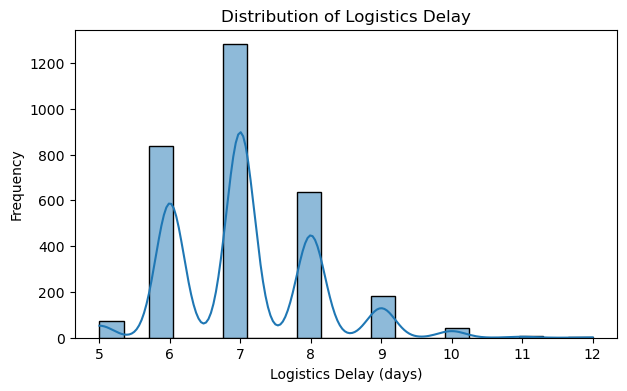

In [34]:
# creating a histogram and density plot of the sample set 
plt.figure(figsize=(7, 4))
sns.histplot(logistics_delay_sample['LogisticsDelay'], kde=True, bins=20)
plt.title('Distribution of Logistics Delay')
plt.xlabel('Logistics Delay (days)')
plt.ylabel('Frequency')
plt.show()

<h5> Interpretation: The histogram and density plot of the sample set show multiple peaks suggesting that the data don't follow a normal distribution

### Statistical Tests
#### After visualizing the data, we perform different statistical test to determine the type of distribution

In [35]:
# Shapiro-Wilk Test for Normality

stat, p_value = stats.shapiro(logistics_delay_sample['LogisticsDelay'])
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')

# Interpretation of Shapiro-Wilk Test
# H0: The logistics delay follows a normal distribution
    # if p value > 0.05, we fail to reject, the data follow a normal distribution
    # if p value < 0.05, we reject, the data do not follow a normal distribution


if p_value > 0.05:
    print("The logistics delay follows a normal distribution (fail to reject H0).")
else:
    print("The logistics delay does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test: Statistics=0.8907687664031982, p-value=3.433181237595802e-42
The logistics delay does not follow a normal distribution (reject H0).


<h5> Interpretation: Both the visual representation and the Shapiro-Wilk Test, indicate that the Logistics Delay does not follow a normal distribution. In this case further testing should be performed.

In [36]:
### Kolmogorov-Smirnov Test for Exponential Distribution

d_stat, d_p_value = stats.kstest(logistics_delay_sample['LogisticsDelay'], 'expon', args=(logistics_delay_sample['LogisticsDelay'].mean(), logistics_delay_sample['LogisticsDelay'].std()))
print(f'Kolmogorov-Smirnov Test: Statistics={d_stat}, p-value={d_p_value}')

# Interpretation of Kolmogorov-Smirnov Test
# H0: The logistics delay follows an exponential distribution
    # if p value > 0.05, we fail to reject, the data follow an exponential distribution
    # if p value < 0.05, we reject, the data do not follow an exponential distribution

if d_p_value > 0.05:
    print("The logistics delay follows an exponential distribution (fail to reject H0).")
else:
    print("The logistics delay does not follow an exponential distribution (reject H0).")

Kolmogorov-Smirnov Test: Statistics=0.7158238172920065, p-value=0.0
The logistics delay does not follow an exponential distribution (reject H0).


<h5> Interpretation: The Kolmogorov-Smirnov Test indicate that the Logistic Delay does not follow an exponential distribution.

In [37]:
### Kolmogorov-Smirnov Test for Gamma Distribution
gamma_params = stats.gamma.fit(logistics_delay_sample['LogisticsDelay'])
d_stat_gamma, d_p_value_gamma = stats.kstest(logistics_delay_sample['LogisticsDelay'], 'gamma', args=gamma_params)
print(f'Kolmogorov-Smirnov Test for Gamma Distribution: Statistics={d_stat_gamma}, p-value={d_p_value_gamma}')


# Interpretation of Kolmogorov-Smirnov Test
# H0: The logistics delay follows a gamma distribution
    # if p value > 0.05, we fail to reject, the data follow  a gamma distribution
    # if p value < 0.05, we reject, the data do not follow  a gamma distribution


if d_p_value_gamma > 0.05:
    print("The logistics delay follows a gamma distribution (fail to reject H0).")
else:
    print("The logistics delay does not follow a gamma distribution (reject H0).")

Kolmogorov-Smirnov Test for Gamma Distribution: Statistics=0.21600036314061488, p-value=5.208266151703579e-126
The logistics delay does not follow a gamma distribution (reject H0).


<h5> Interpretation: The Kolmogorov-Smirnov Test indicate that the Logistic Delay does not follow a gamma distribution.

In [38]:
### Kolmogorov-Smirnov Test for Log-Normal Distribution
lognorm_params = stats.lognorm.fit(logistics_delay_sample['LogisticsDelay'])
d_stat_lognorm, d_p_value_lognorm = stats.kstest(logistics_delay_sample['LogisticsDelay'], 'lognorm', args=lognorm_params)
print(f'Kolmogorov-Smirnov Test for Log-Normal Distribution: Statistics={d_stat_lognorm}, p-value={d_p_value_lognorm}')


# Interpretation of Kolmogorov-Smirnov Test
# H0: The logistics delay follows a Log-Normal distribution
    # if p value > 0.05, we fail to reject, the data follow  a Log-Normal distribution
    # if p value < 0.05, we reject, the data do not follow  a Log-Normal distribution

if d_p_value_lognorm > 0.05:
    print("The logistics delay follows a log-normal distribution (fail to reject H0).")
else:
    print("The logistics delay does not follow a log-normal distribution (reject H0).")

Kolmogorov-Smirnov Test for Log-Normal Distribution: Statistics=0.2179015832535024, p-value=2.9672178452961654e-128
The logistics delay does not follow a log-normal distribution (reject H0).


<h5> Interpretation: The Kolmogorov-Smirnov Test indicate that the Logistic Delay does not follow a log-normal distribution.

<h4>The results of our statistical tests indicate that the data do not follow a normal, exponential, gamma or log-normal distribution. The Logistics Delay data seem to have a complex distribution that is not captured by these parametric distributions.

<h4> To get more insight of the data, we can use the Kernel Density Estimation (KDE), to model the distribution without assuming any specific parametric form.

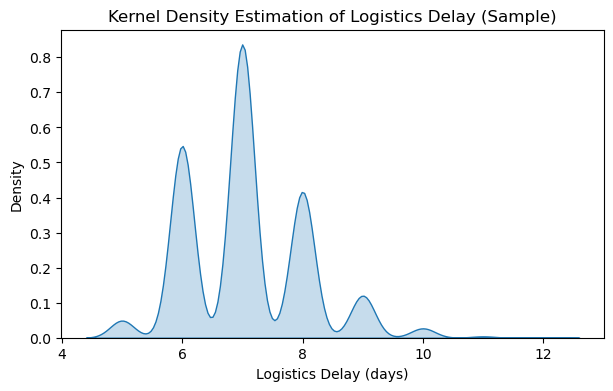

In [39]:
plt.figure(figsize=(7, 4))
sns.kdeplot(logistics_delay_sample['LogisticsDelay'], shade=True)
plt.title('Kernel Density Estimation of Logistics Delay (Sample)')
plt.xlabel('Logistics Delay (days)')
plt.ylabel('Density')
plt.show()

<h4> The KDE plot shows multiple peaks, reinforcing the indication that the logistics delay is multimodal. Specifically we notice peaks around 6, 7, 8 and 9. Which suggests that there may exist distinct groups (clusters) within the data. <h4>
    
    
To get a better understanding, we can use unsupervised learning, to identify patterns and structures within the data. More specifically: Cluster Analysis.

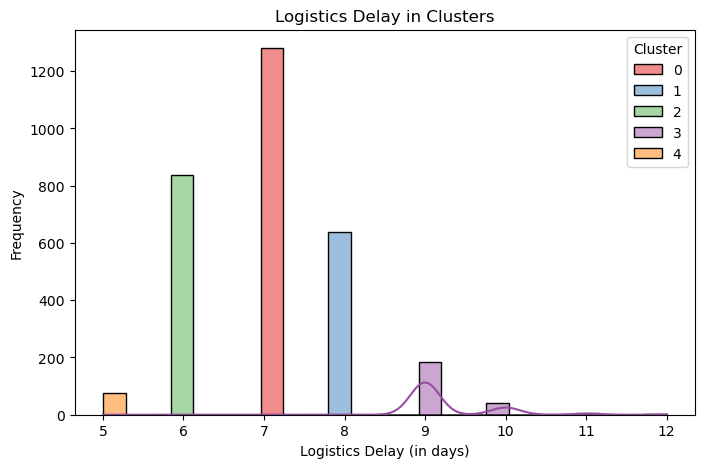

Cluster 0 count    1281.0
mean        7.0
std         0.0
min         7.0
25%         7.0
50%         7.0
75%         7.0
max         7.0
Name: LogisticsDelay, dtype: float64
Cluster 1 count    638.0
mean       8.0
std        0.0
min        8.0
25%        8.0
50%        8.0
75%        8.0
max        8.0
Name: LogisticsDelay, dtype: float64
Cluster 2 count    838.0
mean       6.0
std        0.0
min        6.0
25%        6.0
50%        6.0
75%        6.0
max        6.0
Name: LogisticsDelay, dtype: float64
Cluster 3 count    233.000000
mean       9.253219
std        0.541629
min        9.000000
25%        9.000000
50%        9.000000
75%        9.000000
max       12.000000
Name: LogisticsDelay, dtype: float64
Cluster 4 count    75.0
mean      5.0
std       0.0
min       5.0
25%       5.0
50%       5.0
75%       5.0
max       5.0
Name: LogisticsDelay, dtype: float64


In [40]:
# Cluster Analysis

# reshape data for clustering
data_for_clustering = logistics_delay_sample['LogisticsDelay'].values.reshape(-1, 1)

# perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1).fit(data_for_clustering)
logistics_delay_sample['Cluster'] = kmeans.labels_

# plot clusters
plt.figure(figsize=(8, 5))
sns.histplot(data=logistics_delay_sample, x='LogisticsDelay', hue='Cluster', kde=True, bins=25, palette='Set1')
plt.title('Logistics Delay in Clusters')
plt.xlabel('Logistics Delay (in days)')
plt.ylabel('Frequency')
plt.show()


# Describe the Clusters
cluster_0 = logistics_delay_sample[logistics_delay_sample['Cluster'] == 0]
cluster_1 = logistics_delay_sample[logistics_delay_sample['Cluster'] == 1]
cluster_2 = logistics_delay_sample[logistics_delay_sample['Cluster'] == 2]
cluster_3 = logistics_delay_sample[logistics_delay_sample['Cluster'] == 3]
cluster_4 = logistics_delay_sample[logistics_delay_sample['Cluster'] == 4]

summary_0 = cluster_0['LogisticsDelay'].describe()
summary_1 = cluster_1['LogisticsDelay'].describe()
summary_2 = cluster_2['LogisticsDelay'].describe()
summary_3 = cluster_3['LogisticsDelay'].describe()
summary_4 = cluster_4['LogisticsDelay'].describe()

print("Cluster 0", summary_0)
print("Cluster 1", summary_1)
print("Cluster 2", summary_2)
print("Cluster 3", summary_3)
print("Cluster 4", summary_4)

<h4>After performing the Cluster Analysis we can confirm that the distribution is multimodal. More specifically, delays cluster around:
    
    5 days
    6 days
    7 days
    8 days
    9 to 12 days

This indicates that the delays aren't spread evenly across a range but are instead concentrated at specific points.

<h3> b. Determine the mean logistics delay, considering weekends. Interpret this number and discuss possible alternatives.

In [20]:
#calculating the mean of the logistics delay dataframe using the describe() method. 

logistics_delay_df['LogisticsDelay'].describe() 

NameError: name 'logistics_delay_df' is not defined

The mean logistics delay, considering the weekends, is calculated to be 7.08 days. This number reflects the average time it takes for goods to move through the logistics process, including the time when operations might be slower or paused over the weekend. We can see that also during the Cluster Analysis. Cluster 0, in which the delay is 7 days, has the highest count of observations. 
    
Impact of the weekend: 
Including the weekends in the calculation of the logistics delay can artificially inflate the delay times. For instance, if goods are produced on a Friday, they might not move forward in the process until the following business day, Monday, adding several days to the logistics delay.  


A possible alternative would be to implement or increase weekend operations. For example, some automated processes or partial shifts. This way, the impact of the non-working time during the weekend would be minimized. 
    
Another alternative would be to ensure that goods are not produced on a Friday, that way ensures that the time it takes for goods to move through the logistics process will not be artificially inflated.

<h3> c. Visualize the distribution appropriately by displaying the histogram and density function using “plotly.” Describe how you selected the size of the bins

In [21]:
#create a histogram and ovelay a density function
fig = ff.create_distplot(hist_data=[logistics_delay_sample['LogisticsDelay']], group_labels=['Logistics Delay'], bin_size=1, show_hist=True, show_curve=True)

#customize the layout
fig.update_layout(
    title='Distribution of Logistics Delays',
    xaxis_title='Logistics Delay (days)',
    bargap=0.2)

#show the plot 
fig.show()


NameError: name 'logistics_delay_sample' is not defined

The bin size for a histogram is crucial because it affects the presentation of the data. In this particualr case, since the data is discrete - delays measured in whole days - a bin size of 1 (day) is appropriate. 
This way each delay day has its own bin, clearly highlighting the distribution of the delay time. 

<h3> d) Describe the process for creating a decision tree to classify whether the 
component (K7) is defective (Fehlerhaft) or not. (Hint: Use visualizations.)

### Step 1: Import Packages

Import packages that will be used for the creation of the tree:
matplotlib.pyplot, sklearn etc
    

### Step 2: Data Preparation
#### Merge Datasets 
Combine Komponente_K7 - including the production details  of K7 & Logistikverzug_K7 - which includes the logistics delay of K7

#### Handle Data
Examine the data, check for missing values and decide how to hanlde them (this can be either imputing mean/median or deleting rows with missing data)


### Step 3 Visualize Data 
Plot a correlation matrix to see how the different features (production date, logistics delay, Herstellernummer, Werknummer) interact with the defectiveness of K7. This can help select the most relevant features for the model. 

In addition to that, a boxplot or a histogram can be used to determine the distribution of the data and get a deeper understanding. 

### Step 4  Define Features and Target Variable 

#### Target Variable:
Is the componenent defective or not?

#### Features: 
Determine the features that are most relevant for target variable - for example one of the primary features can be Logistics Delay, or a combination of the Logistics Delay and Herstellernummer. 

### Step 5: Splitting the data

Split the dataset into a training set and a testing set. The training set will be used to train the model and the test set to evaluate the performance of the decision tree. This split can have a balance 70% training and 30% testing. 

### Step 6: Building the decision tree
Use a decision tree classifier from the scikit-learn library. The decision tree algorithm will automatically determine the best splits in the data to classify components as defective or not.

Consider tuning hyperprarameters like: maximum depth of the tree, minimum samples per leaf. 

### Step 7: Evaluate the model
Confusion matrix: Evaluate the model using a confusion matrix to determine the number ofof true positives, false positives, true negatives, and false negatives.

### Step 8: Visualize the decision tree 
Visualize the tree. For example using plot_tree from scikit-learn

### Step 9:  Final model interpretation 
Interprete the tree's structure

<a id="Separate-files"></a>

## Data Storage in Separate Files

<h3> Explain why it makes sense to store the available data in separate files instead of 
saving everything in one large table. Name at least four benefits. The available tables 
represent a typical database structure. What is this structure called?

#### Data security: 
When saved in separate files, sensitive data are better protected. For example, in case of data corruption or loss, the impact is limited to the affected files rather to the whole dataset. 

#### Enhanced performance 
Large tables can lead to slower performance and longer processing times. By creating separate files, queries can be executed faster and more efficiently, as the exposure to unecessery data is limited.

#### Data Integrity 
When data are stored in smaller separate files, the complexity of managing and processing the data is reduced. This leads to fewer errors, which can help maintain accuracy and consistency.

#### Scalability and ease of integration. 
As the data grows, separate files allows to scale more efficiently. New files can be added, or older ones can be removed, without having to mess with the whole system. Similarly, separate files are more easely integrated in different systems.

#### Easier maintenance and debugging
If there is an issue with the data, identifying and fixing the problem is easier when the data is organized into separate files. In addition to that, tasks such as cleaning, or updating can be performed quicker ,as one is focused on specific files instead of the whole data set.

#### The name of such a database structure is: Relational Database Structure

<a id="adelshofen"></a>

## Parts T16 in Registered Vehicles

<h3> Determine how many parts T16 ended up in vehicles registered in Adelshofen

<h4>Extract the unique column names (without .x or .y)

In [43]:
base_columns = set(col.split('.')[0] for col in Einzelteil.columns)

<h4>Initialize an empty DataFrame to store the combined columns

In [44]:
combined_df = pd.DataFrame()

In [45]:
# Loop through each unique base column
for col in base_columns:
    # Combine columns with suffix .x, .y, and the original column
    if f"{col}.x" in Einzelteil.columns and f"{col}.y" in Einzelteil.columns:
        combined_df[col] = Einzelteil[col].combine_first(Einzelteil[f"{col}.x"]).combine_first(Einzelteil[f"{col}.y"])
    elif f"{col}.x" in Einzelteil.columns:
        combined_df[col] = Einzelteil[col].combine_first(Einzelteil[f"{col}.x"])
    elif f"{col}.y" in Einzelteil.columns:
        combined_df[col] = Einzelteil[col].combine_first(Einzelteil[f"{col}.y"])
    else:
        combined_df[col] = Einzelteil[col]


In [46]:
combined_df.head()

,Herstellernummer,Fehlerhaft_Fahrleistung,Fehlerhaft_Datum,Produktionsdatum,Werksnummer,ID_T16,X1,Fehlerhaft
1,212.0,0.0,NaN,2008-11-07,2121.0,16-212-2121-7,1,0.0
2,212.0,0.0,NaN,2008-11-08,2122.0,16-212-2122-41,2,0.0
3,212.0,0.0,NaN,2008-11-07,2121.0,16-212-2121-36,5,0.0
4,212.0,0.0,NaN,2008-11-07,2122.0,16-212-2122-20,10,0.0
5,212.0,0.0,NaN,2008-11-07,2122.0,16-212-2122-33,12,0.0


In [47]:
combined_df.nunique()

Herstellernummer                3
Fehlerhaft_Fahrleistung       426
Fehlerhaft_Datum             2899
Produktionsdatum             2914
Werksnummer                     5
ID_T16                     818844
X1                         818844
Fehlerhaft                      2
dtype: int64

<H4> Merge all the files

In [48]:
# Step 1: Join combined_df and Komponente_df on ID_T16
merged_df1 = pd.merge(combined_df, Komponente_df, on='ID_T16', how='inner')

# Step 2: Join the result with Fahrzeuge_Merged_df on ID_Komponente
merged_df2 = pd.merge(merged_df1, Fahrzeuge_Merged_df, on='ID_Komponente', how='inner')

# Step 3: Join the result with zulassungen_df on IDNummer
final_merged_df = pd.merge(merged_df2, zulassungen_df, on='IDNummer', how='inner')

# Display the first few rows of the final merged DataFrame
final_merged_df.head()

,Herstellernummer,Fehlerhaft_Fahrleistung,Fehlerhaft_Datum,Produktionsdatum,Werksnummer,ID_T16,X1,Fehlerhaft,ID_Komponente,IDNummer,Unnamed: 0,Gemeinden,Zulassung
0,212.0,0.0,NaN,2008-11-07,2121.0,16-212-2121-7,1,0.0,K2ST2-109-1092-2,22-2-21-1,2897615,RIESA,02-01-2009
1,212.0,0.0,NaN,2008-11-08,2122.0,16-212-2122-41,2,0.0,K2ST2-109-1092-59,22-2-21-2,2897616,GROEDITZ,02-01-2009
2,212.0,0.0,NaN,2008-11-07,2121.0,16-212-2121-36,5,0.0,K2ST2-109-1092-7,22-2-21-5,2897619,NAUNHOF,02-01-2009
3,212.0,0.0,NaN,2008-11-07,2122.0,16-212-2122-20,10,0.0,K2ST2-109-1092-41,22-2-21-10,2897624,BEESKOW,02-01-2009
4,212.0,0.0,NaN,2008-11-07,2122.0,16-212-2122-33,12,0.0,K2ST2-109-1092-67,22-2-21-12,2897626,EISENHUETTENSTADT,02-01-2009


<H4> Filter the DataFrame where Gemeinden is 'Adelshofen'

In [49]:
filtered_df = final_merged_df[final_merged_df['Gemeinden'] == 'ADELSHOFEN']

<h4> Count the number of unique ID_T16 values

In [50]:
unique_id_count = filtered_df['ID_T16'].nunique()

In [51]:
print(f"Number of unique ID_T16 where Gemeinden = 'Adelshofen': {unique_id_count}")

Number of unique ID_T16 where Gemeinden = 'Adelshofen': 8


<a id="data-types"></a>

## Attributes of the Registration Table


<h3> Identify the data types of the attributes in the registration table “Zulassungen_aller_Fahrzeuge.” Present your answers in a table integrated into your Markdown document and describe the characteristics of the data types.

In [52]:
# Checking data types of the attributes in Zulassungen_alle_Fahrzeuge
data_types = zulassungen_df.dtypes

In [53]:
# Presenting data types in a table format
data_types_table = pd.DataFrame(data_types, columns=['Data Type'])
print(data_types_table)

           Data Type
Unnamed: 0     int64
IDNummer      object
Gemeinden     object
Zulassung     object


In [54]:
# Rename the Unnamed: 0 column
zulassungen_df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [55]:
# Convert Zulassung to datetime
zulassungen_df['Zulassung'] = pd.to_datetime(zulassungen_df['Zulassung'], format='%d-%m-%Y')

In [56]:
# Check the unique values and count of the "Gemeinden" column
unique_gemeinden = zulassungen_df['Gemeinden'].nunique()
total_gemeinden = zulassungen_df['Gemeinden'].count()

print(f"Total entries in 'Gemeinden': {total_gemeinden}")
print(f"Unique values in 'Gemeinden': {unique_gemeinden}")

Total entries in 'Gemeinden': 1048575
Unique values in 'Gemeinden': 5752


In [57]:
# If unique values are significantly less than total, converting to category is efficient
if unique_gemeinden < total_gemeinden / 2:  # Arbitrary threshold; adjust as needed
    zulassungen_df['Gemeinden'] = zulassungen_df['Gemeinden'].astype('category')
    print("Converted 'Gemeinden' column to category type.")
else:
    zulassungen_df['Gemeinden'] = zulassungen_df['Gemeinden'].astype('str')
    print("Converted 'Gemeinden' column to string type.")

Converted 'Gemeinden' column to category type.


In [58]:
# Check the updated data types
print("Data types after converting 'Gemeinden':")
print(zulassungen_df.dtypes)

Data types after converting 'Gemeinden':
Index                 int64
IDNummer             object
Gemeinden          category
Zulassung    datetime64[ns]
dtype: object


In [59]:
# Update the data types table after conversion
data_types_table = pd.DataFrame(zulassungen_df.dtypes, columns=['Data Type'])

In [60]:
# Normalize the Data Type values to lowercase
data_types_table['Data Type'] = data_types_table['Data Type'].astype(str).str.lower()

In [61]:
# Describe the characteristics of each data type
characteristics = {
    'int64': 'Integer data type, used for numeric data.',
    'float64': 'Floating point data type, used for numeric data with decimals.',
    'object': 'Object data type, often used for text data or mixed data types.',
    'datetime64[ns]': 'Datetime data type, used for date and time information.',
    'category': 'Category data type, used for categorical data to save memory.'
}

In [62]:
# Adding characteristics to the table using .get() with a default value
data_types_table['Characteristics'] = data_types_table['Data Type'].apply(lambda x: characteristics.get(x, 'Unknown data type'))

In [63]:
print(data_types_table)

                Data Type                                    Characteristics
Index               int64          Integer data type, used for numeric data.
IDNummer           object  Object data type, often used for text data or ...
Gemeinden        category  Category data type, used for categorical data ...
Zulassung  datetime64[ns]  Datetime data type, used for date and time inf...


In [64]:
# Convert the table to markdown format
from tabulate import tabulate
markdown_table = tabulate(data_types_table, headers='keys', tablefmt='pipe')


In [65]:
# Print the markdown table
print("\nMarkdown Table:\n")
print(markdown_table)


Markdown Table:

|           | Data Type      | Characteristics                                                 |
|:----------|:---------------|:----------------------------------------------------------------|
| Index     | int64          | Integer data type, used for numeric data.                       |
| IDNummer  | object         | Object data type, often used for text data or mixed data types. |
| Gemeinden | category       | Category data type, used for categorical data to save memory.   |
| Zulassung | datetime64[ns] | Datetime data type, used for date and time information.         |


<H4>  Data Types in "Zulassungen_aller_Fahrzeuge"

#####  Data Types and Characteristics

| Attribute      | Data Type       | Characteristics                                           |
|----------------|-----------------|-----------------------------------------------------------|
| Index          | `int64`         | Integer data type, used for numeric data.                 |
| IDNummer       | `object`        | Object data type, often used for text data or mixed data types. |
| Gemeinden      | `category`      | Category data type, used for categorical data to save memory. |
| Zulassung      | `datetime64[ns]`| Datetime data type, used for date and time information.   |


<a id="linear-Visualization"></a>


## Linear Model for Mileage

<h3> Create a linear model from the table “Fahrzeuge_OEM1_Typ11_Fehleranalyse” relating mileage to suitable variables. Derive recommendations for OEM1 based on this model.

In [66]:
# Dropping the first two columns as they contain the same values
Fahrzeuge_df = Fahrzeuge_df.drop(columns=['Unnamed: 0',  'X1'])

In [67]:
# Display the updated dataframe structure
Fahrzeuge_df.head()

,X,ID_Fahrzeug,Herstellernummer,Werksnummer,Fehlerhaft_Datum,Fehlerhaft_Fahrleistung,days,fuel,engine
0,9,11-1-11-9,1,11,2010-03-16,34824.319559,1493.150761,4.003670,small
1,11,11-1-11-11,1,11,2010-03-16,74217.428309,1044.462231,11.042487,large
2,13,11-1-11-13,1,11,2010-03-16,32230.699639,749.669810,3.579117,small
3,15,11-1-11-15,1,11,2010-03-16,44885.783551,858.688003,4.666801,small
4,37,11-1-11-37,1,11,2010-03-17,86348.329866,1478.204174,4.634381,small


In [68]:
print(Fahrzeuge_df.dtypes)

X                            int64
ID_Fahrzeug                 object
Herstellernummer             int64
Werksnummer                  int64
Fehlerhaft_Datum            object
Fehlerhaft_Fahrleistung    float64
days                       float64
fuel                       float64
engine                      object
dtype: object


In [69]:
# Convert categorical variables into dummy/indicator variables
Fahrzeuge_df = pd.get_dummies(Fahrzeuge_df, columns=['Herstellernummer', 'Werksnummer', 'engine'], drop_first=True)

In [70]:
Fahrzeuge_df.head()

,X,ID_Fahrzeug,Fehlerhaft_Datum,Fehlerhaft_Fahrleistung,days,fuel,Werksnummer_12,engine_medium,engine_small
0,9,11-1-11-9,2010-03-16,34824.319559,1493.150761,4.003670,False,False,True
1,11,11-1-11-11,2010-03-16,74217.428309,1044.462231,11.042487,False,False,False
2,13,11-1-11-13,2010-03-16,32230.699639,749.669810,3.579117,False,False,True
3,15,11-1-11-15,2010-03-16,44885.783551,858.688003,4.666801,False,False,True
4,37,11-1-11-37,2010-03-17,86348.329866,1478.204174,4.634381,False,False,True


In [71]:
print(Fahrzeuge_df.dtypes)

X                            int64
ID_Fahrzeug                 object
Fehlerhaft_Datum            object
Fehlerhaft_Fahrleistung    float64
days                       float64
fuel                       float64
Werksnummer_12                bool
engine_medium                 bool
engine_small                  bool
dtype: object


In [72]:
# Convert Zulassung to datetime
Fahrzeuge_df['Fehlerhaft_Datum'] = pd.to_datetime(Fahrzeuge_df['Fehlerhaft_Datum'], format='mixed')

In [73]:
# Define the feature variables (X) and target variable (y)
X = Fahrzeuge_df.drop(columns=['Fehlerhaft_Fahrleistung', 'Fehlerhaft_Datum', 'Werksnummer_12', 'days', 'ID_Fahrzeug'])
y = Fahrzeuge_df['Fehlerhaft_Fahrleistung']

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Predict the mileage on the test set
y_pred = model.predict(X_test)

In [77]:
# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
# Output the coefficients, MSE, and R-squared value
coefficients = pd.Series(model.coef_, index=X.columns)
model_summary = {
    "Mean Squared Error": mse,
    "R-squared": r2,
    "Coefficients": coefficients
}

model_summary

{'Mean Squared Error': 123515188.0775618,
 'R-squared': 0.4900147838613257,
 'Coefficients': X                   -0.000054
 fuel              5213.628779
 engine_medium     7705.514824
 engine_small     10954.392346
 dtype: float64}

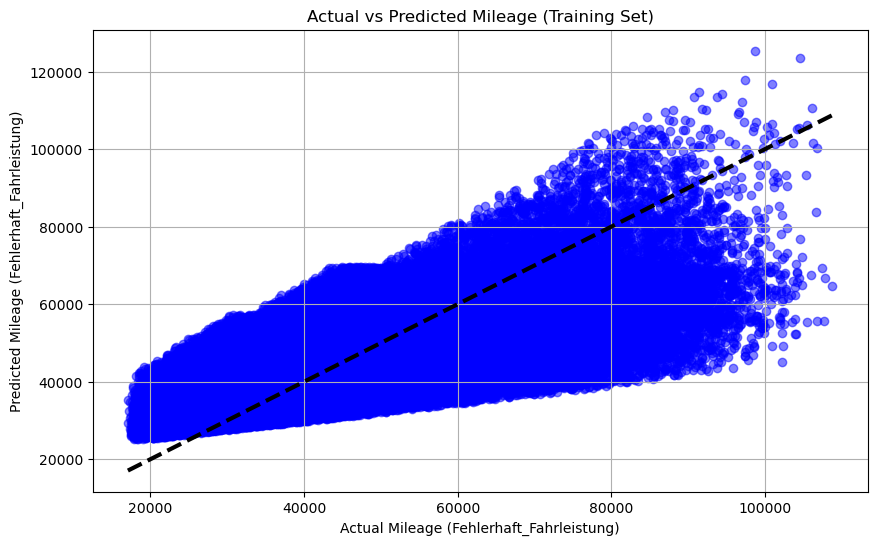

In [79]:
# Calculate predictions for the training set to plot the model's fit
y_train_pred = model.predict(X_train)

# Scatter plot of actual vs predicted mileage (Training set)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Actual Mileage (Fehlerhaft_Fahrleistung)')
plt.ylabel('Predicted Mileage (Fehlerhaft_Fahrleistung)')
plt.title('Actual vs Predicted Mileage (Training Set)')
plt.grid(True)
plt.show()


<a id="hit-and-run"></a>


## Hit and Run Accident Investigation

<h3> On 11.08.2010, there was a hit-and-run accident. The license plate of the car involved is unknown. The police have asked for your assistance, as you work for the Federal Motor Transport Authority, to find out where the vehicle with body part number “K5-112-1122-79” was registered.

In [80]:
# Find the vehicle ID corresponding to the body part number "K5-112-1122-79"
vehicle_info = Bestandteile_Fahrzeuge_OEM1_Typ12_df[Bestandteile_Fahrzeuge_OEM1_Typ12_df['ID_Karosserie'] == 'K5-112-1122-79']

In [81]:
# Extract the ID_Fahrzeug
vehicle_id = vehicle_info['ID_Fahrzeug'].values[0] if not vehicle_info.empty else None
vehicle_id

'12-1-12-82'

In [82]:
# Find the registration details using the vehicle ID
registration_info = zulassungen_df[zulassungen_df['IDNummer'] == vehicle_id]

In [83]:
# Extract the relevant registration details
registration_place = registration_info['Gemeinden'].values[0] if not registration_info.empty else None
registration_place

'ASCHERSLEBEN'

<H4>The vehicle with the body part number "K5-112-1122-79" was registered in Aschersleben